# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [2]:
# Your code here. 
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

<Axes: xlabel='Age', ylabel='Tardies'>

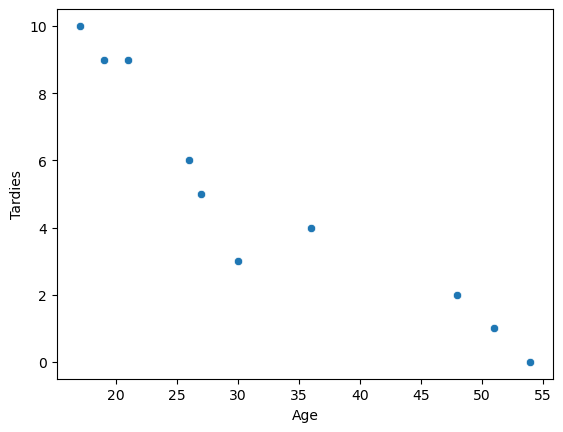

In [3]:
# Your code here
sns.scatterplot(data=student_data, x='Age', y='Tardies')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

**your explanation here**
It seems that while the age increases, the students tend to show late less time to classes.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [4]:
# your code here
covariance = student_data.cov() #Covariance measures the directional relationship between two variables.
print(covariance)

correlation = student_data.corr() #Correlation measures the strength and direction of a linear relationship between two variables.
print(correlation)

                Age    Tardies
Age      187.655556 -45.566667
Tardies  -45.566667  12.544444
              Age   Tardies
Age      1.000000 -0.939163
Tardies -0.939163  1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [5]:
# your explanation here
#The regression that I'll use is Simple Linear Regression, because the given dataframe has two variables where one (tardies) seems to varie depending on the other (age).
# With this, we could consider age to be the independent variable (predictor) and tardies to be the dependent variable (response)

#Defining the predictor and response
predictor = student_data[['Age']]
response = student_data['Tardies']

#split the data into training and tests
X_train, X_test, y_train, y_test = train_test_split(predictor, response, random_state =0 , test_size = 0.25)

# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

# Make prediction
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

# Compute Score
print('Score:')
print(r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred))

# Compute MSE for training and testing sets 
print('MSE:')
print(mean_squared_error(y_train_pred, y_train), mean_squared_error(y_test_pred, y_test))



Score:
0.8660136731364084 0.8218178388688878
MSE:
1.5968982630272952 0.8315167519451903


Plot your regression model on your scatter plot.

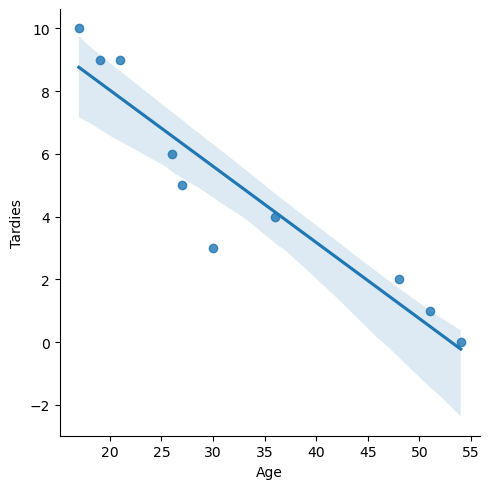

In [6]:
# Your code here.
sns.lmplot(x='Age', y='Tardies', data=student_data, aspect=1)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

*your explanation here*
Looking at Score, this is ~0.87, which indicates that ~87% of the variance in getting late to the classes can be explained by age. However, we don't have a lot of values in the sample, and age alone is not a good predictor on the reason why most of the students arrive late to the class (there may be other external factors that can be impacting, we don't know because the population is very small).

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [9]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("vehicles.csv")
vehicles

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [14]:
# Your code here.

#Creating a new dataframe with the columns Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year, and 'CO2 Emission Grams/Mile' as our outcome variable
columns_analysis = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']
vehicles_columns = vehicles[columns_analysis]

#Creating the correlation matrix based on the outcome variable
correlation_matrix = vehicles_columns.corr()
correlation_with_co2 = correlation_matrix['CO2 Emission Grams/Mile']
correlation_with_co2

Year                      -0.222300
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
Combined MPG              -0.926229
Fuel Cost/Year             0.930865
CO2 Emission Grams/Mile    1.000000
Name: CO2 Emission Grams/Mile, dtype: float64

**RESPONSES** 
The variables that will be the most important in determining the CO2 emissions will be the Fuel Cost/Year and the Combined MPG because these are variables whose values are the most closer to 1 (or -1). The variable *Fuel Cost/Year* is closer to 1, and this strong positive correlation suggest that higher fuel costs are associated with higher CO2 emissions, and *Combined MPG* is closer to -1, which may suggest that higher combined MPG are associated with lowest CO2 emissions.

The variable that has the poor correlation is the Year, which seems to indicate that the CO2 emissions are not impacted by the year when the vehicle was produced, even though it seems to suggest that the CO2 emissions are lower for the most recent cars.



Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

Score:
0.9805248635143082 0.9819303220917216
MSE:
277.5208244858461 252.07013931728855
Mean of CO2 Emission Grams/Mile: 475.3163392572124


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


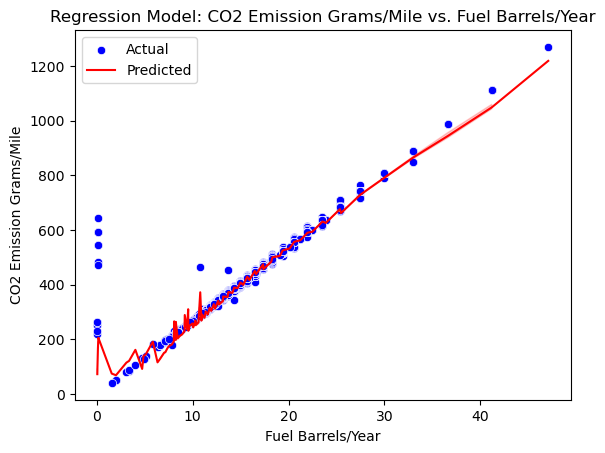

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


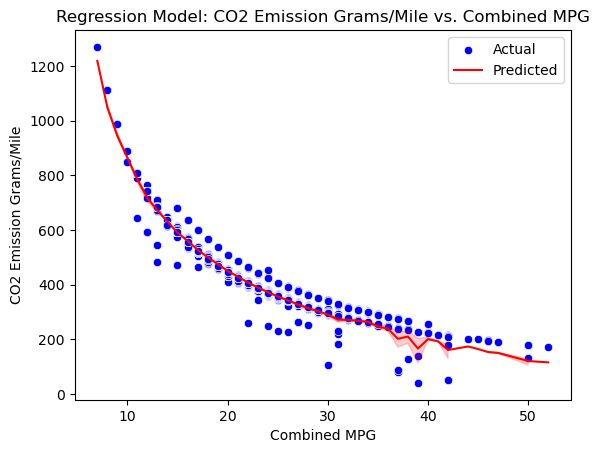

In [32]:
# Your code here.

#Defining the predictor and response
columns_regression = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']
x = vehicles[columns_regression]
y = vehicles['CO2 Emission Grams/Mile']

#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 42 , test_size = 0.25)

# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

# Make prediction
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

# Compute Score
print('Score:')
print(r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred))

# Compute MSE for training and testing sets 
print('MSE:')
print(mean_squared_error(y_train_pred, y_train), mean_squared_error(y_test_pred, y_test))


# Variance and Mean of CO2 Emission Grams/Mile
y_mean = vehicles['CO2 Emission Grams/Mile'].mean()
print(f'Mean of CO2 Emission Grams/Mile: {y_mean}')

sns.scatterplot(x=X_test['Fuel Barrels/Year'], y=y_test, color='blue', label='Actual')
sns.lineplot(x=X_test['Fuel Barrels/Year'], y=y_test_pred, color='red', label='Predicted')
plt.title('Regression Model: CO2 Emission Grams/Mile vs. Fuel Barrels/Year')
plt.legend()
plt.show()


sns.scatterplot(x=X_test['Combined MPG'], y=y_test, color='blue', label='Actual')
sns.lineplot(x=X_test['Combined MPG'], y=y_test_pred, color='red', label='Predicted')
plt.title('Regression Model: CO2 Emission Grams/Mile vs. Combined MPG')
plt.legend()
plt.show()


**RESPONSES**
I decided to go with linear regression, to model the relationship between the CO2 emissions variable and the other predictor variables.
The results for Score are very closer to 1 (either on the training tests and on the test set), so it indicates that the model explains most of the variability in CO2 Emissions.
The MSE values are closer to the CO2 Emission Mean, indicating a good model performance.

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [42]:
# Your code here.
# summary of the model 
import statsmodels.api as sm
est = sm.OLS(y_train, X_train) # Creates an object OLS estimator
est = est.fit()
est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          4.466e+06
Date:                     Fri, 24 May 2024   Prob (F-statistic):                        0.00
Time:                             16:13:57   Log-Likelihood:                     -1.1469e+05
No. Observations:                    26964   AIC:                                  2.294e+05
Df Residuals:                        26959   BIC:                                  2.294e+05
Df Model:                                5                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Year                  0.0626      0.001     63.831      0.000       0.061       0.064
Cylinders             0.8687      0.094      9.205      0.000       0.684       1.054
Fuel Barrels/Year    19.7815      0.069    288.485      0.000      19.647      19.916
Combined MPG         -3.0219      0.050    -60.427      0.000      -3.120      -2.924
Fuel Cost/Year        0.0301      0.001     53.282      0.000       0.029       0.031
==============================================================================
Omnibus:                    54875.528   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        222812703.769
Skew:                          16.958   Prob(JB):                         0.00
Kurtosis:                     447.038   Cond. No.                     2.54e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [39]:
# Your code here.

parties_data = pd.DataFrame({'people_invited': [1,3,4,6,8,9,11,14], 'people_attended': [1,2,4,4,5,7,8,13]})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

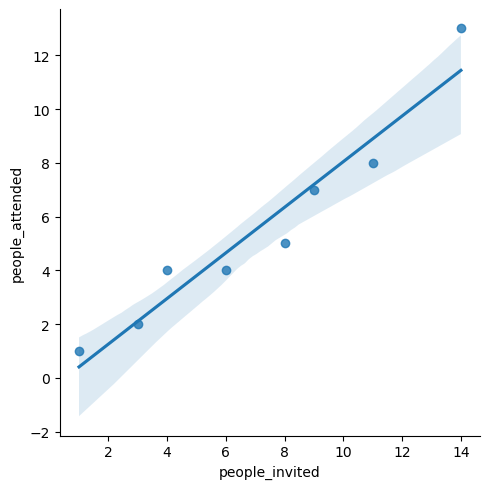

In [44]:
# Your code here.

sns.lmplot(x='people_invited', y='people_attended', data=parties_data)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

*your explanation here*
It seems to indicate that both variables are positively related, where the people attending the party goes higher when the amount of people invited goes higher as well. However, there is not enough data to conclude this, as there may be other factors impacting the analysis.  

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
#your code



What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*your explanation here*